In [6]:
%pip install pandas numpy matplotlib seaborn plotly folium geopandas scikit-learn openpyxl

  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached et_xmlfile-2.0.0-py3-none-any.whl.metadata (2.7 kB)
Using cached openpyxl-3.1.5-py2.py3-none-any.whl (250 kB)
Using cached et_xmlfile-2.0.0-py3-none-any.whl (18 kB)

[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: /Users/macbook/PycharmProjects/MiddleEastAnalysis/.venv/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Загружаем датасет
df = pd.read_excel('data_set.xlsx')
print(df.shape)
print(df.columns.tolist())  # Колонки: ['year', 'month', 'iso3', 'country', 'region', 'event_type', 'sub_event_type', 'actor1', 'actor2', 'interaction', 'civilian_targeting', 'fatalities', 'notes']

(139953, 13)
['WEEK', 'REGION', 'COUNTRY', 'ADMIN1', 'EVENT_TYPE', 'SUB_EVENT_TYPE', 'EVENTS', 'FATALITIES', 'POPULATION_EXPOSURE', 'DISORDER_TYPE', 'ID', 'CENTROID_LATITUDE', 'CENTROID_LONGITUDE']


In [12]:
num_cols = ['EVENTS', 'FATALITIES', 'POPULATION_EXPOSURE', 'CENTROID_LATITUDE', 'CENTROID_LONGITUDE']
cat_cols = ['REGION', 'COUNTRY', 'EVENT_TYPE', 'SUB_EVENT_TYPE', 'DISORDER_TYPE']

df['WEEK'] = pd.to_datetime(df['WEEK'])
df['YEAR']  = df['WEEK'].dt.year
df['MONTH'] = df['WEEK'].dt.month
df['DAY']   = df['WEEK'].dt.day

In [13]:
print(df[num_cols + ['YEAR', 'MONTH']].describe())

              EVENTS     FATALITIES  POPULATION_EXPOSURE  CENTROID_LATITUDE  \
count  139953.000000  139953.000000         1.115380e+05      139953.000000   
mean        4.056412       3.683579         7.838945e+04          30.220818   
std         9.249537      25.206969         1.635961e+05           8.728483   
min         1.000000       0.000000         1.000000e+00           4.769000   
25%         1.000000       0.000000         1.176300e+04          28.272800   
50%         2.000000       0.000000         3.122750e+04          33.283200   
75%         3.000000       1.000000         7.899100e+04          36.108900   
max       324.000000    2982.000000         7.692873e+06          42.938500   

       CENTROID_LONGITUDE           YEAR          MONTH  
count       139953.000000  139953.000000  139953.000000  
mean            41.203691    2020.759819       6.539524  
std              6.010122       2.851868       3.422305  
min             26.695700    2014.000000       1.000000 

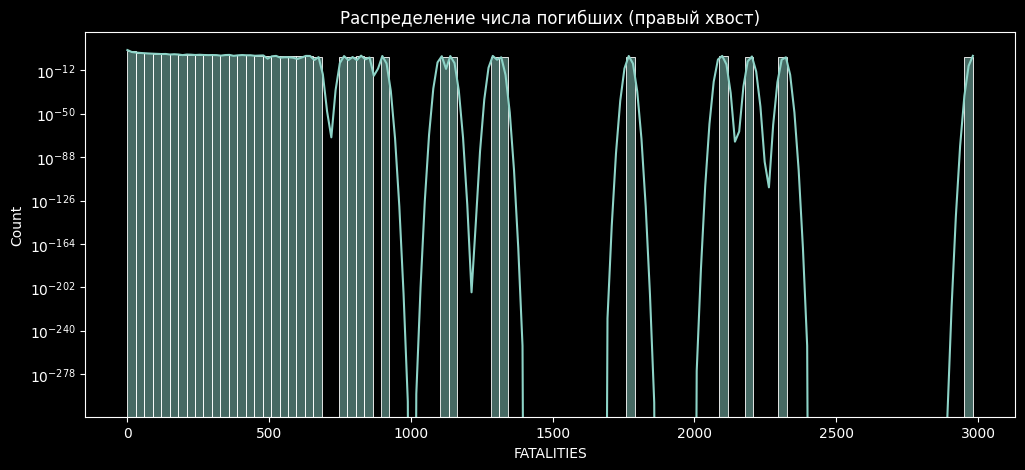

In [15]:
plt.figure(figsize=(12,5))
sns.histplot(data=df, x='FATALITIES', bins=100, kde=True)
plt.yscale('log')
plt.title('Распределение числа погибших (правый хвост)')
plt.show()